파이썬데이터분석 기말 과제 

ICT 공학부 202104256 윤유빈,
ICT 공학부 202104272 이민서

주제 변경 이유: 원래는 전기차 관련 데이터를 이용하여 전기차 충전소를 어디에 위치해야 효율적인지 분석하고자 하였으나 관련 데이터가 부족하여 주제를 바꾸기로 판단했음

주제: 업종별 카드매출과 매장수 데이터, 유동인구 등의 데이터를 이용하여 예비 창업자들에게 창업 주제를 추천해고자 데이터를 분석하였다. 
위치를 제주도로 잡고 제주도 업종별 카드매출과 매장수 데이터, 제주도 유동인구 데이터, 제주 관광 소비행태 데이터 카드사 음식 급상승 22년 데이터를 이용함

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
cm = pd.read_csv('/Users/yun-yubeen/PyDA/Jeju/제주특별자치도_주제1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용_매쉬업결과_21.csv', encoding='euc-kr')
cm

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2021-01,제주시,도심,삼도일동,S96121,욕탕업,법인,단체,NaN,알수없음,160000,61,서비스업,2021-07-26
1,2021-01,제주시,읍면,한림읍,S96121,욕탕업,내국인,개별,70.0,남성,10000,61,서비스업,2021-07-26
2,2021-01,제주시,읍면,구좌읍,S96121,욕탕업,제주도민,도민,40.0,남성,15000,61,서비스업,2021-07-26
3,2021-01,제주시,도심,도두일동,S96121,욕탕업,법인,단체,NaN,알수없음,56000,61,서비스업,2021-07-26
4,2021-01,제주시,도심,삼도이동,S96121,욕탕업,제주도민,도민,70.0,남성,1154000,61,서비스업,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193850,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.0,여성,7800,189,소매업,2021-07-26
193851,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26
193852,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26
193853,2021-05,서귀포시,도심,동홍동,G47121,슈퍼마켓,기타외국,단체,NaN,알수없음,340730,189,소매업,2021-07-26


In [14]:
cm.head()

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2021-01,제주시,도심,삼도일동,S96121,욕탕업,법인,단체,NaN,알수없음,160000,61,서비스업,2021-07-26
1,2021-01,제주시,읍면,한림읍,S96121,욕탕업,내국인,개별,70.0,남성,10000,61,서비스업,2021-07-26
2,2021-01,제주시,읍면,구좌읍,S96121,욕탕업,제주도민,도민,40.0,남성,15000,61,서비스업,2021-07-26
3,2021-01,제주시,도심,도두일동,S96121,욕탕업,법인,단체,NaN,알수없음,56000,61,서비스업,2021-07-26
4,2021-01,제주시,도심,삼도이동,S96121,욕탕업,제주도민,도민,70.0,남성,1154000,61,서비스업,2021-07-26


업종별 카드 매출과 매장수 데이터의 행과 열의 수

In [15]:
#행, 열 확인하기
cm.shape

(193855, 14)

In [16]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193855 entries, 0 to 193854
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   년월       193855 non-null  object 
 1   시도명      193855 non-null  object 
 2   지역구분     193855 non-null  object 
 3   읍면동명     193855 non-null  object 
 4   업종코드     193855 non-null  object 
 5   업종명      193855 non-null  object 
 6   이용자 구분   193855 non-null  object 
 7   관광구분     193855 non-null  object 
 8   연령대      179600 non-null  float64
 9   성별       193855 non-null  object 
 10  이용금액     193855 non-null  int64  
 11  매장수      193855 non-null  int64  
 12  업종명 대분류  193776 non-null  object 
 13  데이터기준일자  193855 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 20.7+ MB


In [17]:
#결측치 확인
cm.isna().sum()

년월             0
시도명            0
지역구분           0
읍면동명           0
업종코드           0
업종명            0
이용자 구분         0
관광구분           0
연령대        14255
성별             0
이용금액           0
매장수            0
업종명 대분류       79
데이터기준일자        0
dtype: int64

결측치가 있어 0으로 채웠습니다.

In [18]:
cm.fillna(0, inplace=True)
#결측치를 0으로 채움

In [19]:
cm.describe().T

,count,mean,std,min,25%,50%,75%,max
연령대,193855.0,3.953063e+01,2.010706e+01,0.0,20.0,40.0,60.0,7.000000e+01
이용금액,193855.0,3.673225e+06,1.884000e+07,10.0,91500.0,400000.0,1734789.0,1.222900e+09
매장수,193855.0,8.587462e+02,1.479927e+03,2.0,182.0,402.0,890.0,7.010000e+03


In [20]:
#문자열에 대한 기술통계량 
cm.describe(include=['object']).T

,count,unique,top,freq
년월,193855,5,2021-05,40369
시도명,193855,2,제주시,124693
지역구분,193855,2,도심,145066
읍면동명,193855,72,연동,5276
업종코드,193855,41,G47122,14619
업종명,193855,41,체인화 편의점,14619
이용자 구분,193855,7,내국인,110033
관광구분,193855,3,도민,69578
성별,193855,3,남성,92605
업종명 대분류,193855,7,소매업,102155


기술통계량을 보니 이용자는 내국인이 제일 많으므로 내국인 중심으로 데이터 분석을 할 것이다.
업종은 체인화 편의점이 제일 많은 것을 알 수 있었다.

업종명의 종류 알아보기

In [21]:
cm_type = cm['업종명'].unique()
print(cm_type)

['욕탕업' '관광 민예품 및 선물용품 소매업' '비알콜 음료점업' '수산물 소매업' '한식 음식점업' '호텔업' '여관업'
 '체인화 편의점' '서양식 음식점업' '중식 음식점업' '화장품 및 방향제 소매업' '피자, 햄버거, 샌드위치 및 유사 음식점업'
 '전시 및 행사 대행업' '차량용 가스 충전업' '빵 및 과자류 소매업' '기타음식료품위주종합소매업' '골프장 운영업'
 '차량용 주유소 운영업' '기타 대형 종합 소매업' '기타 주점업' '그외 기타 분류안된 오락관련 서비스업' '휴양콘도 운영업'
 '그외 기타 스포츠시설 운영업' '마사지업' '내항 여객 운송업' '건강보조식품 소매업' '면세점' '일반유흥 주점업'
 '택시 운송업' '기타 갬블링 및 베팅업' '정기 항공 운송업' '기타 수상오락 서비스업' '그외 기타 종합 소매업'
 '기타 외국식 음식점업' '육류 소매업' '일식 음식점업' '과실 및 채소 소매업' '자동차 임대업' '여행사업'
 '스포츠 및 레크레이션 용품 임대업' '슈퍼마켓']


In [22]:
cm_t = cm['업종명'].value_counts()

for word, count in  cm_t.items():
    print(f'{word}: {count}')

체인화 편의점: 14619
한식 음식점업: 14421
서양식 음식점업: 12653
슈퍼마켓: 11832
차량용 주유소 운영업: 10327
비알콜 음료점업: 10002
빵 및 과자류 소매업: 9635
과실 및 채소 소매업: 9057
중식 음식점업: 8757
일식 음식점업: 8632
피자, 햄버거, 샌드위치 및 유사 음식점업: 8189
수산물 소매업: 7027
스포츠 및 레크레이션 용품 임대업: 6651
육류 소매업: 6549
여관업: 5536
기타 외국식 음식점업: 5521
기타음식료품위주종합소매업: 4721
관광 민예품 및 선물용품 소매업: 4591
차량용 가스 충전업: 4386
전시 및 행사 대행업: 4178
화장품 및 방향제 소매업: 3843
욕탕업: 3363
골프장 운영업: 1928
일반유흥 주점업: 1876
건강보조식품 소매업: 1857
기타 주점업: 1777
호텔업: 1769
그외 기타 종합 소매업: 1723
휴양콘도 운영업: 1719
자동차 임대업: 1437
기타 대형 종합 소매업: 1284
여행사업: 1134
면세점: 702
그외 기타 스포츠시설 운영업: 626
내항 여객 운송업: 441
마사지업: 418
기타 수상오락 서비스업: 228
정기 항공 운송업: 204
그외 기타 분류안된 오락관련 서비스업: 160
택시 운송업: 79
기타 갬블링 및 베팅업: 3


기술통계량에서 봤듯이 체인화 편의점이 가장 많고 그 다음으로 한식 음식점업이 많았다.

-------------------------------------------

이용금액을 기준으로 내림차순 정렬하여 상위 10개 확인하기

-------------------------------------------

In [23]:
cm.sort_values('이용금액', ascending=False).head(10)

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
73645,2021-02,서귀포시,읍면,남원읍,I55113,휴양콘도 운영업,중국,단체,0.0,알수없음,1222900000,15,숙박업,2021-07-26
127099,2021-04,제주시,도심,용담이동,G47130,면세점,법인,개별,0.0,알수없음,992984835,19,소매업,2021-07-26
157030,2021-05,제주시,도심,용담이동,G47130,면세점,법인,개별,0.0,알수없음,977241930,19,소매업,2021-07-26
138731,2021-04,제주시,도심,연동,I56111,한식 음식점업,법인,개별,0.0,알수없음,875323132,6944,음식점업,2021-07-26
169033,2021-05,서귀포시,읍면,안덕면,R91121,골프장 운영업,법인,개별,0.0,알수없음,868201705,18,서비스업,2021-07-26
84597,2021-03,제주시,도심,용담이동,G47130,면세점,법인,개별,0.0,알수없음,847419510,19,소매업,2021-07-26
192361,2021-05,제주시,도심,연동,I56111,한식 음식점업,법인,개별,0.0,알수없음,840337712,6855,음식점업,2021-07-26
102788,2021-03,제주시,도심,연동,I56111,한식 음식점업,법인,개별,0.0,알수없음,812816759,7010,음식점업,2021-07-26
171799,2021-05,제주시,읍면,애월읍,R91121,골프장 운영업,법인,개별,0.0,알수없음,785165335,29,서비스업,2021-07-26
87539,2021-03,서귀포시,읍면,남원읍,I55113,휴양콘도 운영업,중국,단체,0.0,알수없음,780800000,15,숙박업,2021-07-26


이용금액을 업종명과 함께 표를 나타내고 순위를 알아보기

In [24]:
grouped = cm.groupby('업종명')['이용금액'].sum().sort_values(ascending=False)

table = pd.DataFrame(grouped)
table.reset_index(inplace=True)
table.columns = ['업종명', '이용금액']

print(table)

                        업종명          이용금액
0                   한식 음식점업  148404722617
1                      슈퍼마켓   78587315961
2               차량용 주유소 운영업   67481994104
3                       면세점   47852111476
4                   체인화 편의점   43140115725
5                   골프장 운영업   30027699801
6              기타 대형 종합 소매업   27943627910
7             기타음식료품위주종합소매업   27391584428
8                  서양식 음식점업   20079850592
9                       여관업   17855651133
10                      호텔업   17085980298
11             그외 기타 종합 소매업   16668111390
12                 휴양콘도 운영업   15623752407
13              과실 및 채소 소매업   15331768867
14                  일식 음식점업   13987186736
15                  수산물 소매업   13827756343
16       스포츠 및 레크레이션 용품 임대업   13521463071
17                   육류 소매업   11833591791
18              빵 및 과자류 소매업    9919428077
19                  자동차 임대업    9325078741
20                정기 항공 운송업    9151980289
21                  중식 음식점업    7897811228
22  피자, 햄버거, 샌드위치 및 유사 음식점업    743

위의 표를 시각화하여 나타내기

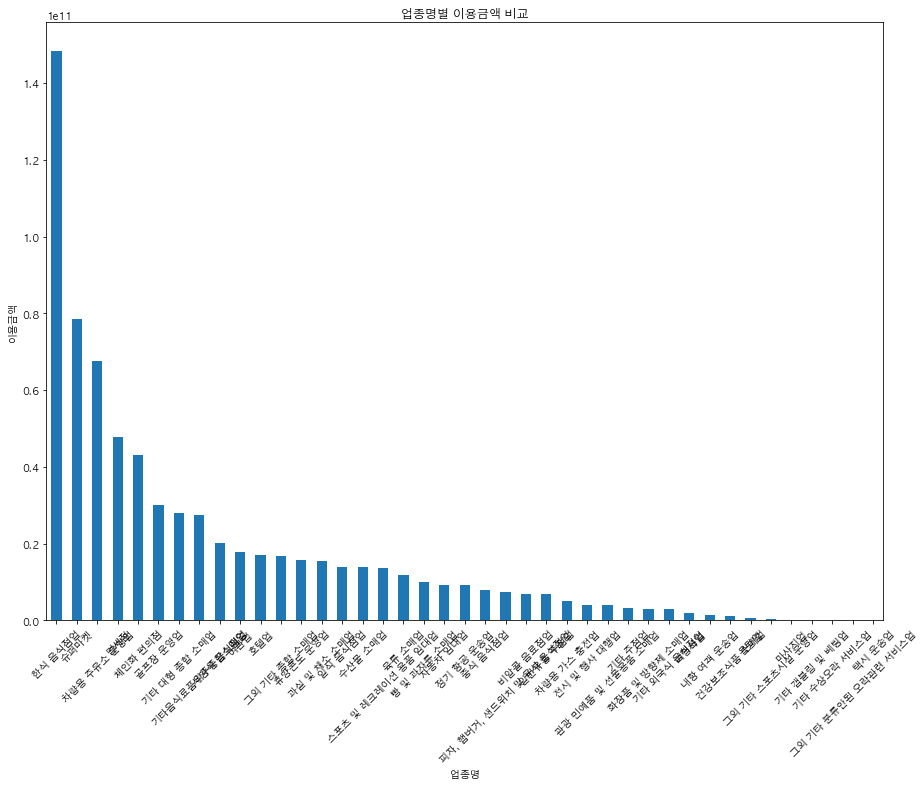

In [25]:
plt.rcParams['font.family'] = 'AppleGothic'#폰트 설정

grouped = cm.groupby('업종명')['이용금액'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,11))
grouped.plot(kind='bar')
plt.xlabel('업종명')
plt.ylabel('이용금액')
plt.title('업종명별 이용금액 비교')
plt.xticks(rotation=45)
plt.show()

* 제주도 업종별 수 순위: 

1위 체인화 편의점: 14619

2위 한식 음식점업: 14421

3위 서양식 음식점업: 12653

4위 슈퍼마켓: 11832

5위 차량용 주유소 운영업: 10327

-------------------------------
 
6위 비알콜 음료점업: 10002

7위 빵 및 과자류 소매업: 9635

8위 과실 및 채소 소매업: 90579

9위 중식 음식점업: 8757

10위 일식 음식점업: 8632

* 이용금액의 순위: 

1위 한식 음식점업       148404722617 

2위 슈퍼마켓            78587315961

3위 차량용 주유소 운영업   67481994104

4위 면세점              47852111476

5위 체인화 편의점         43140115725

-------------------------------

6위 골프장 운영업         30027699801

7위 기타 대형 종합 소매업   27943627910

8위 기타음식료품위주종합소매업 27391584428

9위 서양식 음식점업        20079850592

10위 여관업              17855651133

-> 제주도에서 가장 많은 업종 5개와 사람들의 이용금액이 높은 업종 5개를 보면
체인화 편의점, 한식 음식점업, 슈퍼마켓, 차량용 주유소 운영업이 공통적으로 높은 것을 알 수 있었다.




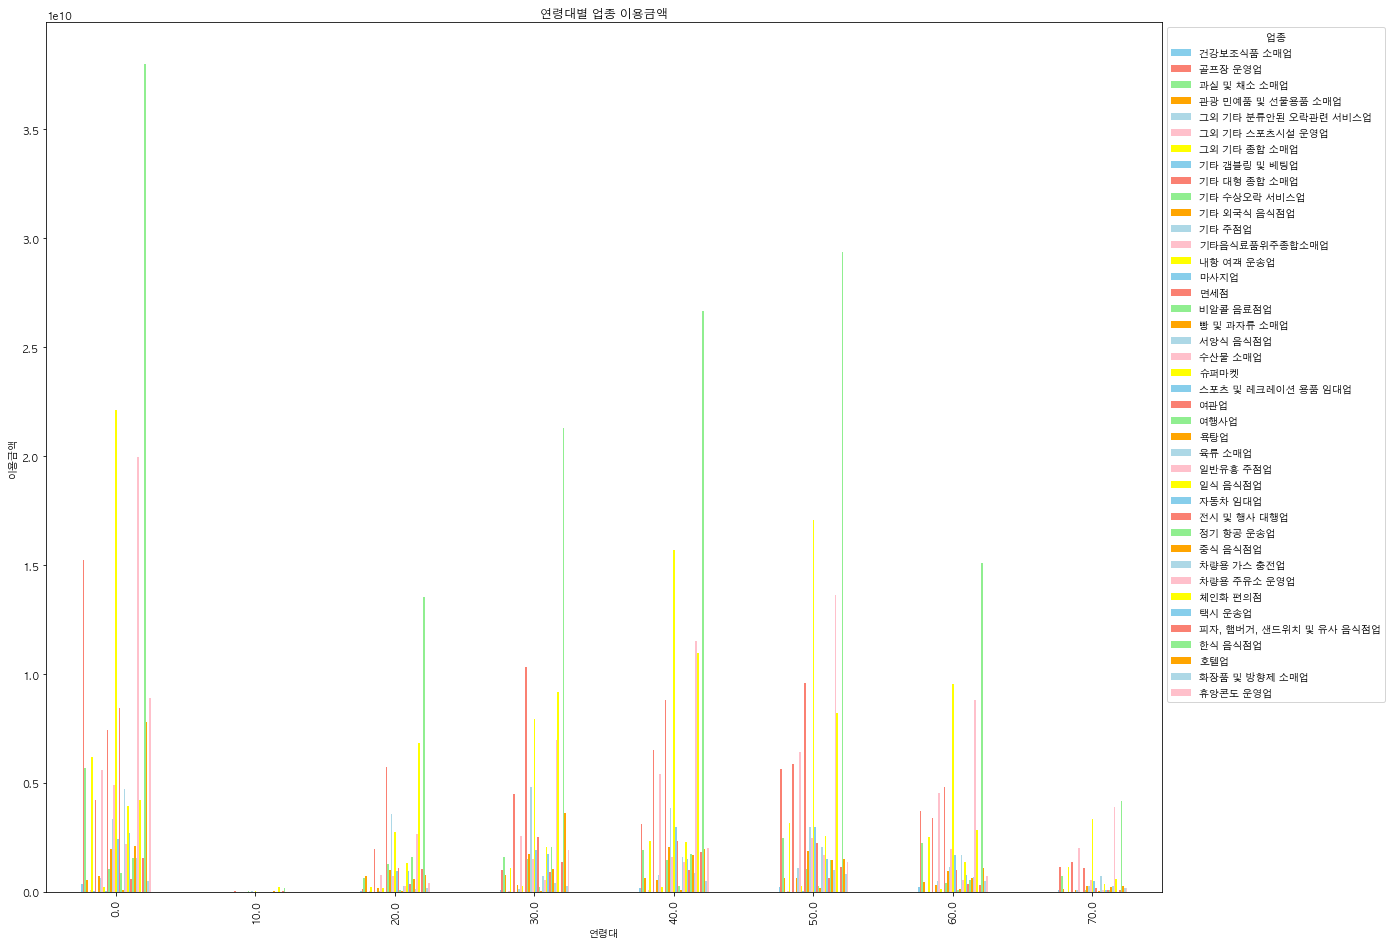

In [26]:
# 연령대와 업종별 이용금액 합산
grouped = cm.groupby(['연령대', '업종명'])['이용금액'].sum().unstack()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow']

grouped.plot(kind='bar', figsize=(20, 16), color=colors)
plt.xlabel('연령대')
plt.ylabel('이용금액')
plt.title('연령대별 업종 이용금액')

plt.legend(title='업종', bbox_to_anchor=(1, 1))
plt.show()

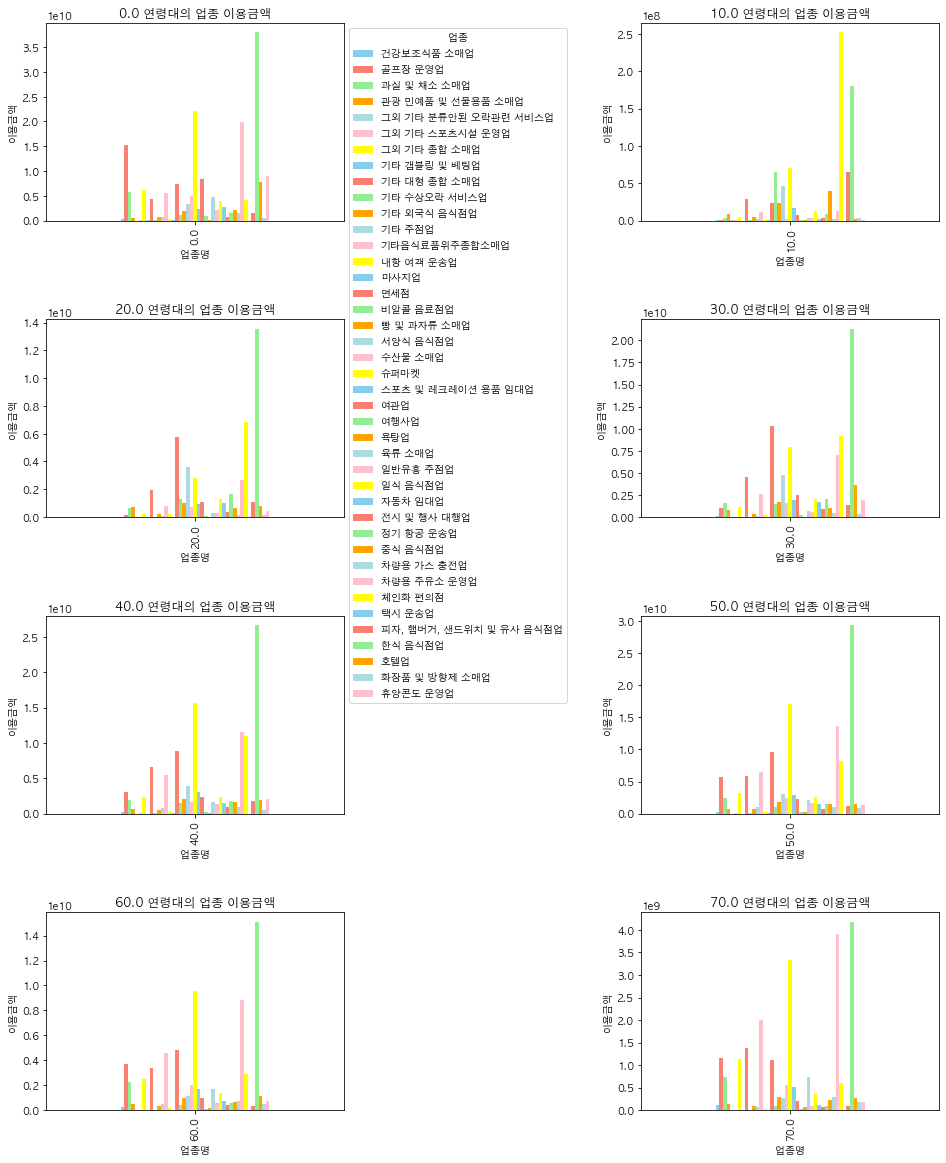

In [27]:
# 연령대와 업종별 이용금액 합산
grouped = cm.groupby(['연령대', '업종명'])['이용금액'].sum().unstack()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow']


age_groups = grouped.index.unique()
num_plots = len(age_groups)
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(16, 20))

plt.subplots_adjust(wspace=1, hspace=0.5)

for i, age in enumerate(age_groups):
    ax = axes[i // cols, i % cols]
    age_group = grouped.loc[[age]]
    age_group.plot(kind='bar', ax=ax, color=colors)
    ax.set_xlabel('업종명')
    ax.set_ylabel('이용금액')
    ax.set_title(f'{age} 연령대의 업종 이용금액')
    ax.legend(title='업종', bbox_to_anchor=(1, 1))
    
    if i == 0:
        ax.legend(title='업종', bbox_to_anchor=(1, 1))
    else:
        ax.legend().remove()

plt.show()


- 연령이 0인 것은 연령을 알수없는 데이터


전체적으로 한식 음식업종에 소비를 많이 한 것을 알 수 있다.

In [28]:
# 연령대와 업종별 이용금액 합산
grouped = cm.groupby(['연령대', '업종명'])['이용금액'].sum().unstack()

# 상위 5개 업종 뽑기
top_5_by_age = {}
age_groups = grouped.index.unique()

for age in age_groups:
    age_group = grouped.loc[[age]]
    top_5 = age_group.sum().nlargest(5)
    top_5_by_age[age] = top_5.index.tolist()

# 상위 5개 업종 출력
for age, top_5 in top_5_by_age.items():
    print(f'{age} 연령대의 상위 5개 업종:')
    print(top_5)
    print()


0.0 연령대의 상위 5개 업종:
['한식 음식점업', '슈퍼마켓', '차량용 주유소 운영업', '골프장 운영업', '휴양콘도 운영업']

10.0 연령대의 상위 5개 업종:
['체인화 편의점', '한식 음식점업', '슈퍼마켓', '비알콜 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업']

20.0 연령대의 상위 5개 업종:
['한식 음식점업', '체인화 편의점', '면세점', '서양식 음식점업', '슈퍼마켓']

30.0 연령대의 상위 5개 업종:
['한식 음식점업', '면세점', '체인화 편의점', '슈퍼마켓', '차량용 주유소 운영업']

40.0 연령대의 상위 5개 업종:
['한식 음식점업', '슈퍼마켓', '차량용 주유소 운영업', '체인화 편의점', '면세점']

50.0 연령대의 상위 5개 업종:
['한식 음식점업', '슈퍼마켓', '차량용 주유소 운영업', '면세점', '체인화 편의점']

60.0 연령대의 상위 5개 업종:
['한식 음식점업', '슈퍼마켓', '차량용 주유소 운영업', '면세점', '기타음식료품위주종합소매업']

70.0 연령대의 상위 5개 업종:
['한식 음식점업', '차량용 주유소 운영업', '슈퍼마켓', '기타음식료품위주종합소매업', '기타 대형 종합 소매업']



------------

제주도 내국인 유동인구 구성비율 알아보기

In [29]:
columns_to_keep = ['emd_name', 'visit_population_count']  # 유지할 열들의 리스트
p = pd.read_csv('/Users/yun-yubeen/PyFinal/내국인 유동인구 구성비율...csv', encoding = 'euc-kr', usecols=columns_to_keep)

In [30]:
#결측치 처리
p.isna().sum()

emd_name                  0
visit_population_count    0
dtype: int64

In [31]:
p.fillna(0, inplace=True)

In [32]:
p.dtypes.value_counts()

object     1
float64    1
dtype: int64

In [33]:
# 필요한 열 선택
selected_columns = ['emd_name', 'visit_population_count']
df_selected = p[selected_columns]

In [34]:
# 위치별 유동인구 합계 계산
df_location_grouped = df_selected.groupby('emd_name')['visit_population_count'].sum()
df_location_grouped_sorted = df_location_grouped.sort_values(ascending=False)

In [35]:
# 위치별 유동인구 통계 출력
print("위치별 유동인구 통계:")
print(df_location_grouped_sorted)

위치별 유동인구 통계:
emd_name
제주시 이도2동    4.281200e+08
제주시 연동      3.871532e+08
제주시 애월읍     3.775294e+08
제주시 노형동     3.696045e+08
제주시 아라동     2.429371e+08
제주시 용담2동    2.218493e+08
제주시 조천읍     2.166836e+08
제주시 오라동     2.090390e+08
제주시 일도2동    1.807896e+08
서귀포시 안덕면    1.692538e+08
제주시 한림읍     1.655336e+08
서귀포시 성산읍    1.591610e+08
제주시 화북동     1.563986e+08
서귀포시 대륜동    1.459774e+08
제주시 이도1동    1.442853e+08
제주시 구좌읍     1.395650e+08
서귀포시 남원읍    1.273882e+08
서귀포시 동홍동    1.250391e+08
서귀포시 예래동    1.247865e+08
제주시 건입동     1.154707e+08
서귀포시 표선면    1.093996e+08
서귀포시 대정읍    1.084582e+08
제주시 삼도1동    1.068303e+08
제주시 삼도2동    9.832774e+07
서귀포시 대천동    9.777355e+07
서귀포시 중문동    9.035677e+07
제주시 삼양동     8.374154e+07
제주시 외도동     8.173736e+07
제주시 봉개동     7.666541e+07
서귀포시 중앙동    7.617859e+07
제주시 용담1동    7.288150e+07
서귀포시 정방동    6.885628e+07
제주시 도두동     6.537753e+07
서귀포시 영천동    6.532823e+07
서귀포시 서홍동    5.731802e+07
제주시 한경면     5.640679e+07
제주시 이호동     5.426208e+07
제주시 일도1동    4.970394e+07
서귀포시 천지동    3.264519e+07
서귀포

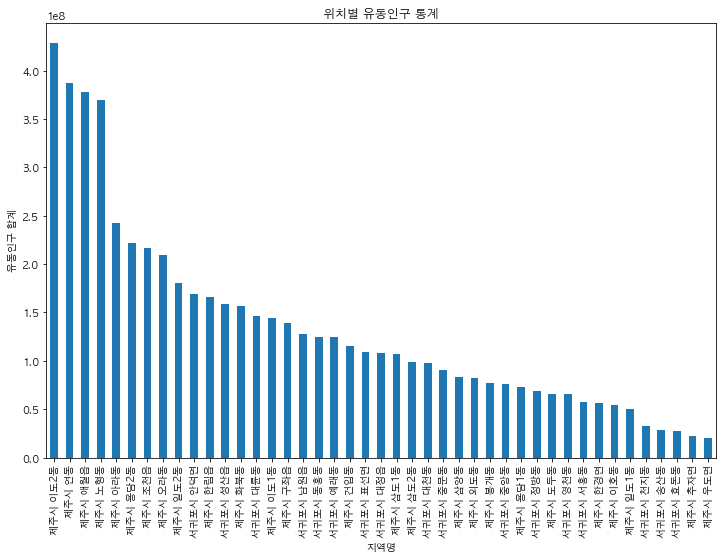

In [36]:
# 위치별 유동인구 통계 시각화
plt.rcParams['font.family'] = 'AppleGothic'#폰트 설정

plt.figure(figsize=(12, 8))
df_location_grouped_sorted.plot(kind='bar')
plt.xlabel('지역명')
plt.ylabel('유동인구 합계')
plt.title('위치별 유동인구 통계')

plt.show()

관광객 유동인구 수가 많은 순으로 상위 5개의 위치: 
   
   제주시 이도2동, 제주시 연동, 제주시 애월읍, 제주시 노형동, 제주시 아라동 인 것을 알 수 있다.
   
   
   
 ---------------
 

In [37]:
pd.read_csv('/Users/yun-yubeen/PyDA/Jeju/관광 소비행태 데이터_카드사 음식 급_컬럼정의서.csv')

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,ANALS_YM,분석년월,VARCHAR,6,N,N
1,2,CMPNM_NM,상호명,VARCHAR,200,N,N
2,3,SIGNGU_NM,시군구명,VARCHAR,200,N,N
3,4,ADSTRD_NM,행정동명,VARCHAR,200,N,N
4,5,AREA_NM,지역명,VARCHAR,200,N,N
5,6,MLSFC_NM,중분류명,VARCHAR,200,N,N
6,7,SCLAS_NM,소분류명,VARCHAR,200,N,N
7,8,JJINHBT_SALES_PRICE_RATE,제주도민매출금액비율,DECIMAL,"28,5",N,N
8,9,JJINHBT_SALES_CO_RATE,제주도민매출수비율,DECIMAL,"28,5",N,N
9,10,OTSD_SALES_PRICE_RATE,외지인매출금액비율,DECIMAL,"28,5",N,N


음식점이 인기있는 것으로 보아 제주도 내 음식 관련 데이터를 찾아보았다.
제주 관광 소비행태 데이터 카드사 음식 급상승 22년 데이터를 가져왔다.
그 중에서도 한식 음식점업의 수가 많았으므로 한식을 중심으로 살펴볼것이다.

In [42]:
#데이터가 월별로 나눠져 있어 데이터를 합쳐 살펴볼 것이다.
files = ['JT_SHP_SALES_VARTION_LIST_202203.csv', 'JT_SHP_SALES_VARTION_LIST_202204.csv', 'JT_SHP_SALES_VARTION_LIST_202205.csv',
         'JT_SHP_SALES_VARTION_LIST_202206.csv', 'JT_SHP_SALES_VARTION_LIST_202207.csv', 'JT_SHP_SALES_VARTION_LIST_202208.csv',
         'JT_SHP_SALES_VARTION_LIST_202209.csv', 'JT_SHP_SALES_VARTION_LIST_202210.csv', 'JT_SHP_SALES_VARTION_LIST_202211.csv',
         'JT_SHP_SALES_VARTION_LIST_202212.csv']

merged_df = pd.read_csv(files[0], encoding='utf-8-sig')

# 데이터프레임 합치기
for file in files[1:]:
    df = pd.read_csv(file, encoding='utf-8-sig')
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# 필요한 열만 추출 -> 분석년월, 상호명, 시군구명, 행정동명, 지역명, 중분류명, 소분류명, 전체매출금액비율만 추출하였다.
selected_columns = ['ANALS_YM', 'CMPNM_NM', 'SIGNGU_NM', 'ADSTRD_NM', 'AREA_NM', 'MLSFC_NM', 'SCLAS_NM', 'ALL_SALES_PRICE_RATE']
food = merged_df[selected_columns]

print(food)



        ANALS_YM       CMPNM_NM SIGNGU_NM ADSTRD_NM AREA_NM  MLSFC_NM  \
0         202203        카페 서연의집      서귀포시       남원읍     남원읍        음료   
1         202203  메가엠지씨커피 제주남원점      서귀포시       남원읍     남원읍        음료   
2         202203            초이당      서귀포시       남원읍     남원읍        한식   
3         202203          공천포식당      서귀포시       남원읍     남원읍        한식   
4         202203          제주머슴네      서귀포시       남원읍     남원읍        한식   
...          ...            ...       ...       ...     ...       ...   
134692    202212     한림바다생태체험마을       제주시       한림읍     한림읍      일식.회   
134693    202212      아이스크림 할인점      서귀포시       남원읍     남원읍  베이커리.디저트   
134694    202212          성원아라점       제주시       아라동    제주시내        중식   
134695    202212             봄봄       제주시       아라동    제주시내        카페   
134696    202212      가파도마을협동조합      서귀포시       대정읍     대정읍        한식   

        SCLAS_NM  ALL_SALES_PRICE_RATE  
0             커피                  0.16  
1             커피                  0.11  


In [39]:
#결측치 확인
food.isna().sum()

ANALS_YM                0
CMPNM_NM                0
SIGNGU_NM               0
ADSTRD_NM               0
AREA_NM                 0
MLSFC_NM                0
SCLAS_NM                0
ALL_SALES_PRICE_RATE    0
dtype: int64

이 파일에도 위에서 분석한 파일과 같이 한식의 비율이 높은지 알아보기 

In [40]:
food_t = food['MLSFC_NM'].value_counts()

for word, count in  food_t.items():
    print(f'{word}: {count}')

한식: 91457
간식: 7180
음료: 6571
아시아음식: 6105
패스트푸드: 5953
양식: 3980
주점및주류판매: 2988
카페: 2302
고기: 2104
피자.치킨.햄버거: 1607
일식.회: 1362
베이커리.디저트: 1161
중식: 732
분식: 675
기타: 243
주점: 204
부페: 73


카드 소비 행태를 분석한 것이니 한식업에서 카드를 많이 사용했다는 것은 알 수 있다.

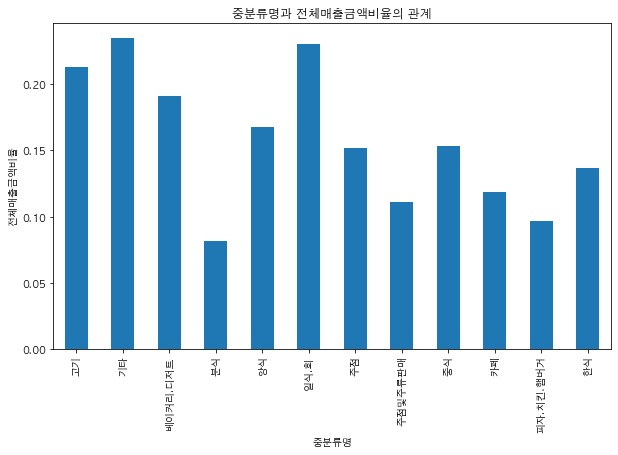

In [41]:
# 중분류명과 전체매출금액비율 간의 관계 분석
grouped = df.groupby('MLSFC_NM')['ALL_SALES_PRICE_RATE'].mean()

grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('중분류명')
plt.ylabel('전체매출금액비율')
plt.title('중분류명과 전체매출금액비율의 관계')
plt.show()

하지만 매출과의 관계를 보았을 때는 한식이 아니라 일식, 회의 매출이 높은 것으로 나타났다.

----------


결론과 시사점:

제주도에서 가장 많은 업종 5개와 매출이 높은 업종 5개를 보면
체인화 편의점, 한식 음식점업, 슈퍼마켓, 차량용 주유소 운영업이 공통적으로 높은 것을 알 수 있었다.

관광 시에 식사는 빠질 수 없는 요소이기에 한식 음식점업 중심으로 데이터를 살펴보고 
제주 관광 소비행태 데이터 카드사 음식 급상승 22년 데이터에도 한식의 비율이 높을 것으로 예상했었다. 

하지만 카드의 종류와 날짜의 다른 점, 트렌드는 계속 바뀐다는 영향으로 한식의 비율이 높진 않았다.


업종별 카드매출과 매장수 데이터를 살펴보며 특정 업종의 높은 카드매출을 확인하고 이를 이용해 창업에 유망한 업종으로 추천할 수 있을 것으로 생각했다.
또한 매장수 데이터를 통해 경쟁 업체의 수를 파악하고, 
카드사의 음식 급상승 데이터를 통해 최근 트렌드와 소비자들의 선호도를 파악하여 이를 기반으로 창업 아이디어를 도출할 수 있을 것이다.


관광객 유동인구 수가 많은 순으로 제주시 이도2동, 제주시 연동, 제주시 애월읍, 제주시 노형동, 제주시 아라동 인 것을 알 수 있었고 
이를 통해 창업 지역을 선정하는데에 도움을 줄 수 있을것으로 예상되었다.
   
  
예비창업자들 중, 제주도에서 창업을 고려하는 창업자들에게 카드매출이 높고 유동인구와 관광객들의 소비 행태를 고려하여 창업 주제를 추천해줄 수 있다.
업종별 카드매출과 매장수 데이터, 제주도 유동인구 데이터, 제주 관광 소비행태 데이터 카드사 음식 급상승 22년 데이터 외에도 
요즘 뜨는 트렌드 분석과 관광객들의 만족도, 관심도 등의 데이터를 살펴보면 창업을 추천하는데에 많은 도움이 될 것으로 생각한다.
